In [1]:
import numpy as np
from pyearth import Earth
from matplotlib import pyplot

In [2]:
%matplotlib inline
import seaborn as sns
import pandas as pd

In [3]:
# Read the data set
df=pd.read_excel("data/DataSet_GasPrice_ Outlier_Removed.xlsx")
df.head()

,Days,Date,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons,GasPrice,Weather,WSTAT,GasPriceStatus,GPSAT,color
0,245,2008-12-31,57.22,41.12,2227.028,2399.702,5.82,WINTER,1,HIGH,1,1
1,276,2009-01-31,54.37,41.71,2251.938,2729.715,5.24,WINTER,1,HIGH,1,1
2,304,2009-02-28,52.30,39.09,2074.167,2332.539,4.52,WINTER,1,HIGH,1,1
3,335,2009-03-31,44.34,47.94,2262.488,2170.709,3.96,WINTER,1,HIGH,1,1
4,365,2009-04-30,41.92,49.65,2147.856,1741.293,3.50,SPRING,0,HIGH,1,1


GasPrice vs AveCoalPrice
In this case, gas price will be regressed against average coal price



In [4]:
# Use only one feature
x = df.AveCoalPrice[:, np.newaxis]
X = x[:,]
y = df.GasPrice

In [5]:
#Fit an Earth model
model = Earth()
model.fit(X,y)

Earth(allow_linear=None, allow_missing=False, check_every=None,
   enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
   fast_h=None, feature_importance_type=None, max_degree=None,
   max_terms=None, min_search_points=None, minspan=None,
   minspan_alpha=None, penalty=None, smooth=None, thresh=None,
   use_fast=None, verbose=0, zero_tol=None)

In [6]:
#Print the model
print(model.trace())
print(model.summary())

Forward Pass
----------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq    
----------------------------------------------------------------
0     -       -    -     0.828287  1      0.844  0.000  0.000   
1     0       0    -1    0.522311  2      0.559  0.369  0.338   
2     0       0    64    0.509846  4      0.605  0.384  0.284   
3     0       0    2     0.484498  6      0.640  0.415  0.242   
4     0       0    16    0.478817  8      0.708  0.422  0.161   
5     0       0    22    0.474484  10     0.792  0.427  0.062   
6     0       0    18    0.467509  12     0.887  0.436  -0.050  
7     0       0    54    0.465779  14     1.014  0.438  -0.200  
----------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
----------------------------------------------
iter  bf  terms  mse   gcv    rsq     grsq    
---------------------------------------------

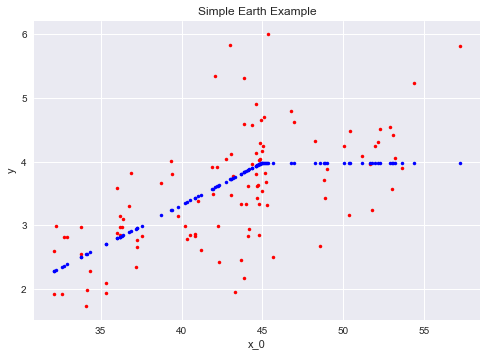

In [11]:
#Plot the model
y_hat = model.predict(X)
pyplot.figure()
pyplot.plot(X[:,0],y,'r.')
pyplot.plot(X[:,0],y_hat,'b.')
pyplot.xlabel('x_0')
pyplot.ylabel('y')
pyplot.title('Simple Earth Example')
pyplot.show()